In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [3]:
def metroplis(start, value, proposal, niter, nburn=0):
    cur = start
    value[cur[0]][cur[1]] = np.random.choice([0,1])
    post = [value[cur[0]][cur[1]]]
    for i in range(niter):
        #prop = proposal(cur)
        prop = np.random.randint(0, 8, 2)
        if prop[0]>0 and value[prop[0]-1,prop[1]]==1:
            value[prop[0],prop[1]] = 0
        elif prop[0]<7 and value[prop[0]+1,prop[1]]==1:
            value[prop[0],prop[1]] = 0
        elif prop[1]>0 and value[prop[0],prop[1]-1]==1:
            value[prop[0],prop[1]] = 0
        elif prop[1]<7 and value[prop[0],prop[1]+1]==1:
            value[prop[0],prop[1]] = 0
        else:
            value[prop[0],prop[1]] = 1
        cur = prop
        post.append(value[prop[0],prop[1]])
    return post[nburn:]

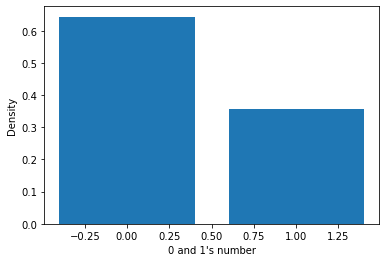

In [30]:
def proposal(x):
    while True:
        a = np.array([[-1,0], [1,0], [0,1], [0,-1]])
        s = a[np.random.randint(0, 4)]
        if 0<=(x+s)[0]<=7 and 0<=(x+s)[1]<=7:
            return x+s
start = np.random.randint(0, 8, 2)
value = np.zeros((8,8))
N = 10000
post = metroplis(start, value, proposal, N)

plt.hist(post[1000:], bins=np.arange(3) - 0.5,rwidth=0.8, density=True)
plt.xlabel('0 and 1\'s number')
plt.ylabel('Density')
plt.show()

In [31]:
n = 0
for i in range(N):
    if post[i]==1:
        n+=1
n*64/N

22.9184

Получаем, что среднее число вершин с числом 1 = 23

In [19]:
def g_test(x, start=0.1, end=0.5):
    return stats.ttest_ind(x[:int(len(x) * start)], x[-int(len(x) * end):], equal_var=False)

In [32]:
g_test(post[1000:])

Ttest_indResult(statistic=-1.1796066394307207, pvalue=0.23837332847080336)

Мы видим, что pvalue получилось больше 0.05, что говорит о верности нулевой гипотезы - равенства средних двух выборок.
Вывод: гипотезу стацинарности не отвергаем.

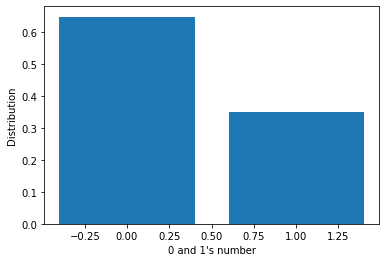

In [45]:
plt.hist(post[2000:3000], bins=np.arange(3) - 0.5,rwidth=0.8, density=True)
plt.xlabel('0 and 1\'s number')
plt.ylabel('Distribution')
plt.show()

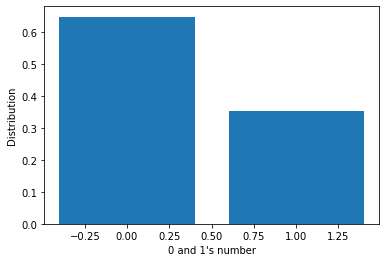

In [46]:
plt.hist(post[7000:8000], bins=np.arange(3) - 0.5,rwidth=0.8, density=True)
plt.xlabel('0 and 1\'s number')
plt.ylabel('Distribution')
plt.show()

In [41]:
n = 0
for i in range(1000):
    if post[i+2000]==1:
        n+=1
n*64/1000

22.464

In [44]:
n = 0
for i in range(1000):
    if post[i+7000]==1:
        n+=1
n*64/1000

22.592

Мы видим, что на разных участках одинаковой длины распределение примерно одинаковое.

In [72]:
def distr(j):
    n = 0
    N = 100
    for i in range(N):
        if post[i+j]==1:
            n+=1
    return n*64/N
d = [distr(i) for i in range(1000,10000,100)]

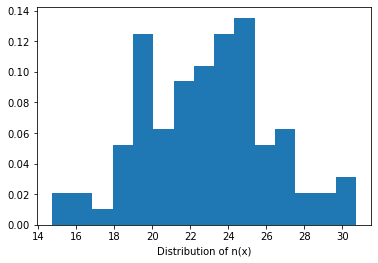

In [73]:
plt.hist(d, bins=15, density=True)
plt.xlabel('Distribution of n(x)')
plt.show()

Изобразим раскраску этого же графа 8 на 8

In [88]:
import networkx as nx
g = nx.Graph()
for i in range(63):
    if (i+1)%8!=0:
        g.add_edge(i, i+1)
for i in range(56):
    g.add_edge(i, i+8)

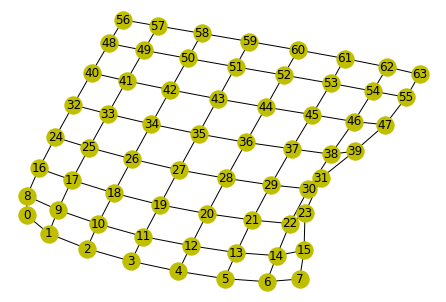

In [91]:
nx.draw(g, with_labels = True, node_color='y')

In [104]:
f = nx.Graph()
def metro(start, value, niter, nburn=0):
    for i in range(8):
        for j in range(8):
            plt.scatter(i,j,c='r')
    cur = start
    value[cur[0]][cur[1]] = np.random.choice([0,1])
    post = [value[cur[0]][cur[1]]]
    for i in range(niter):
        prop = np.random.randint(0, 8, 2)
        if prop[0]>0 and value[prop[0]-1,prop[1]]==1:
            value[prop[0],prop[1]] = 0
        elif prop[0]<7 and value[prop[0]+1,prop[1]]==1:
            value[prop[0],prop[1]] = 0
        elif prop[1]>0 and value[prop[0],prop[1]-1]==1:
            value[prop[0],prop[1]] = 0
        elif prop[1]<7 and value[prop[0],prop[1]+1]==1:
            value[prop[0],prop[1]] = 0
        else:
            value[prop[0],prop[1]] = 1
            if i>1000 and i<2000:
                plt.scatter(prop[0],prop[1],c='b')
        cur = prop
        post.append(value[prop[0],prop[1]])
    plt.grid()
    plt.xlabel('Раскраска графа 8 на 8')
    plt.show()
    return post[nburn:]

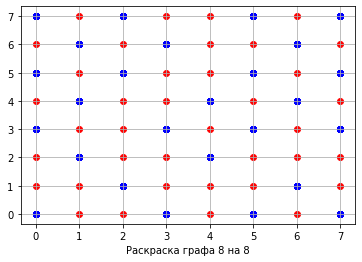

In [105]:
start = np.random.randint(0, 8, 2)
value = np.zeros((8,8))
N = 10000
post = metro(start, value, N)

(Синие точки - вершины с числом 1)

Исследуем теперь зависимость среднего числа вершин с числом 1 от размера графа

In [106]:
def fun(start, value, k, niter, nburn=0):
    cur = start
    value[cur[0]][cur[1]] = np.random.choice([0,1])
    post = [value[cur[0]][cur[1]]]
    for i in range(niter):
        prop = np.random.randint(0, k, 2)
        if prop[0]>0 and value[prop[0]-1,prop[1]]==1:
            value[prop[0],prop[1]] = 0
        elif prop[0]<k-1 and value[prop[0]+1,prop[1]]==1:
            value[prop[0],prop[1]] = 0
        elif prop[1]>0 and value[prop[0],prop[1]-1]==1:
            value[prop[0],prop[1]] = 0
        elif prop[1]<k-1 and value[prop[0],prop[1]+1]==1:
            value[prop[0],prop[1]] = 0
        else:
            value[prop[0],prop[1]] = 1
        cur = prop
        post.append(value[prop[0],prop[1]])
    return post[nburn:]

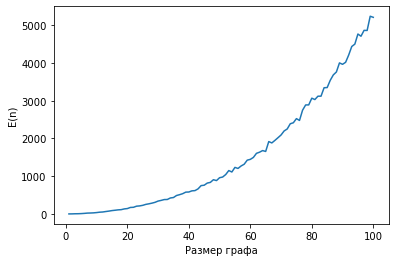

In [113]:
a = []
for k in range(1,101):
    start = np.random.randint(0, k, 2)
    value = np.zeros((k,k))
    N = 5000
    post = fun(start, value, k, N)
    n = 0
    for i in range(1000,N):
        if post[i]==1:
            n+=1
    a.append(n*k*k/(N-1000))

plt.plot(np.arange(1,101),a)
plt.xlabel('Размер графа')
plt.ylabel('E(n)')
plt.show()

Мы получили квадратичную зависимость E(n) от N